In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import psycopg2
import re

In [3]:
# connection to database:
try:
    conn = psycopg2.connect("dbname='spatial' user='postgres' host='localhost' password='deeznuts'")
except:
    print("cant connect to the database")

In [4]:
cur = conn.cursor()

In [5]:
#Query top correlated features found in sales analysis regression along with rrdistance calculations
sql = 'select price, total_area, volusia.sales_analysis.aprland, rrdistance from volusia.sales_analysis inner join volusia.parcel on (volusia.sales_analysis.parid = volusia.parcel.parid);'
df = pd.read_sql_query(sql, conn)
df = df.dropna()

In [6]:
df.head()

,price,total_area,aprland,rrdistance
0,197500.0,2403.0,29110.0,4038.479341
2,170000.0,1697.0,23040.0,1824.650896
3,162000.0,1833.0,26880.0,1438.207356
4,239000.0,3200.0,28400.0,1457.797489
5,233000.0,2419.0,25313.0,5240.863915


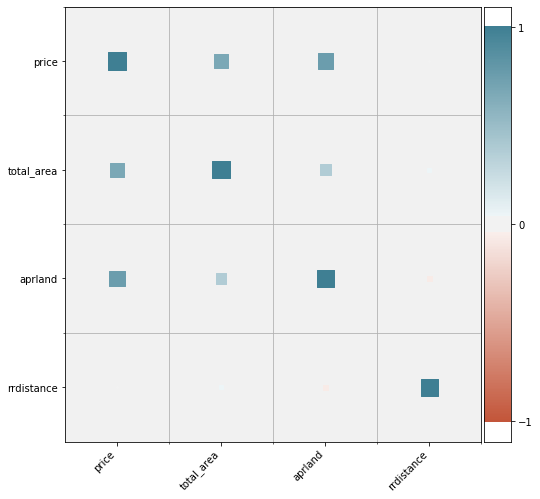

In [7]:
#Correlation between railroads to price against full dataset is non-existent
#Need to bin the datframe based on distance to railroads
from heatmap import heatmap, corrplot
plt.figure(figsize=(8,8))
corrplot(df.corr(), size_scale=300)

In [8]:
cur2 = conn.cursor()
sql2 = 'select price, total_area, volusia.sales_analysis.aprland, rrdistance from volusia.sales_analysis inner join volusia.parcel on (volusia.sales_analysis.parid = volusia.parcel.parid) where rrdistance < 5281;'
df2 = pd.read_sql_query(sql2, conn)
df2 = df2.dropna()

In [9]:
df2.head()

,price,total_area,aprland,rrdistance
0,197500.0,2403.0,29110.0,4038.479341
1,233000.0,2419.0,25313.0,5240.863915
2,179400.0,1907.0,28017.0,1776.143856
3,170000.0,1697.0,23040.0,1824.650896
4,162000.0,1833.0,26880.0,1438.207356


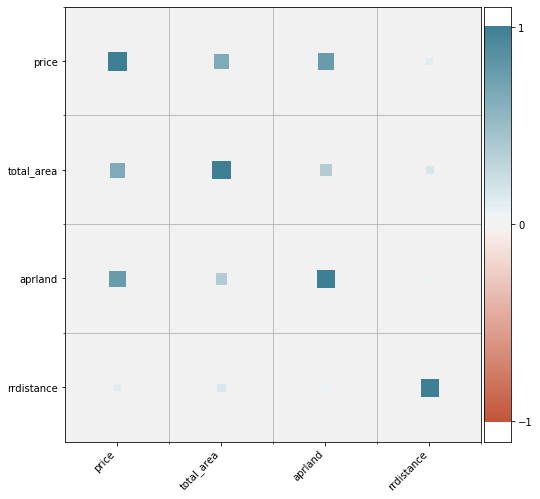

In [10]:
#Visualize correlation where parcel is within one mile of a railroad
from heatmap import heatmap, corrplot
plt.figure(figsize=(8,8))
corrplot(df2.corr(), size_scale=300)

In [11]:
#---get the top 3 features that has the highest correlation---
print(df2.corr().abs().nlargest(3, 'price').index)

#---print the top 3 correlation values---
print(df2.corr().abs().nlargest(3, 'price').values[:,3])

Index(['price', 'aprland', 'total_area'], dtype='object')
[0.11867909 0.06713829 0.16749907]


In [12]:
#Even when filtering for  within one mile rrdistance has a suprisingly low correlation
df2.corr()

,price,total_area,aprland,rrdistance
price,1.000000,0.649517,0.769320,0.118679
total_area,0.649517,1.000000,0.373053,0.167499
aprland,0.769320,0.373053,1.000000,0.067138
rrdistance,0.118679,0.167499,0.067138,1.000000


In [13]:
#Railroad tracks within 400 ft
sql3 = 'select price, total_area, volusia.sales_analysis.aprland, rrdistance from volusia.sales_analysis inner join volusia.parcel on (volusia.sales_analysis.parid = volusia.parcel.parid) where rrdistance < 401;'
df3 = pd.read_sql_query(sql3, conn)
df3 = df3.dropna()

In [17]:
df3.head()

,price,total_area,aprland,rrdistance
1,250000.0,2438.0,32000.0,340.529305
2,239000.0,2136.0,32000.0,254.444823
3,185000.0,2069.0,32000.0,41.963030
4,389500.0,3915.0,32000.0,234.685328
5,45000.0,1289.0,27712.0,84.688670


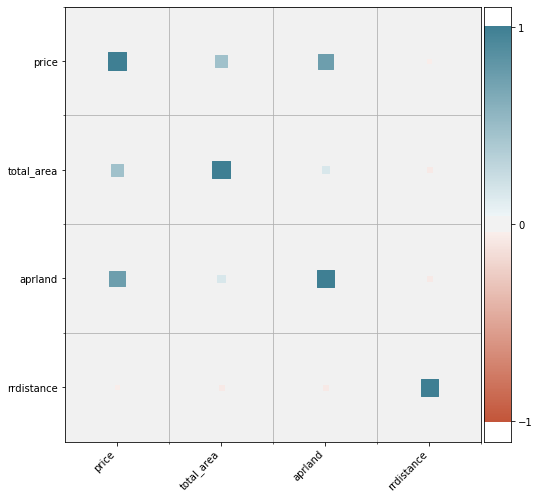

In [14]:
plt.figure(figsize=(8,8))
corrplot(df3.corr(), size_scale=300)

In [16]:
#Very suprising, it seems that rrdistance now has a lower correlation
df3.corr()

,price,total_area,aprland,rrdistance
price,1.000000,0.471361,0.751331,-0.049361
total_area,0.471361,1.000000,0.167357,-0.073979
aprland,0.751331,0.167357,1.000000,-0.071964
rrdistance,-0.049361,-0.073979,-0.071964,1.000000


In [20]:
#Join for 3 bedrooms
sql4 = "select price, total_area, volusia.sales_analysis.aprland, rrdistance from volusia.sales_analysis inner join volusia.parcel on (volusia.sales_analysis.parid = volusia.parcel.parid) where rmbed = 3 and volusia.sales_analysis.luc = '0100'"
df4 = pd.read_sql_query(sql4, conn)
df4 = df4.dropna()

In [21]:
df4.head()

,price,total_area,aprland,rrdistance
0,215000.0,1946.0,19758.0,19855.011140
1,750000.0,3595.0,292392.0,5291.013929
2,860000.0,3928.0,301529.0,5322.168666
3,360000.0,6904.0,337590.0,5244.917425
4,360000.0,5513.0,318060.0,5224.120998


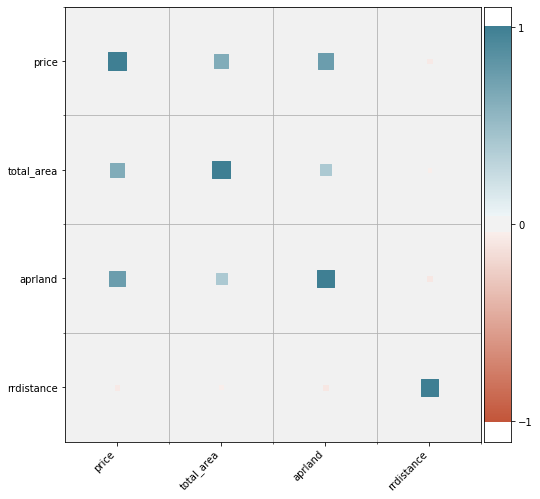

In [22]:
plt.figure(figsize=(8,8))
corrplot(df4.corr(), size_scale=300)

In [35]:
#Correlation still low for 3 bedrooms
#Need to implement distance constraint
sql5 = "select price, total_area, volusia.sales_analysis.aprland, rrdistance from volusia.sales_analysis inner join volusia.parcel on (volusia.sales_analysis.parid = volusia.parcel.parid) where rmbed = 3 and volusia.sales_analysis.luc = '0100' and rrdistance < 401"
df5 = pd.read_sql_query(sql5, conn)
df5 = df5.dropna()

In [36]:
df5.head()

,price,total_area,aprland,rrdistance
0,252000.0,2620.0,30000.0,348.186949
1,242400.0,2187.0,30000.0,298.699812
2,237500.0,2360.0,30000.0,249.212481
3,238500.0,2188.0,30000.0,188.502115
4,236800.0,2260.0,30000.0,50.971853


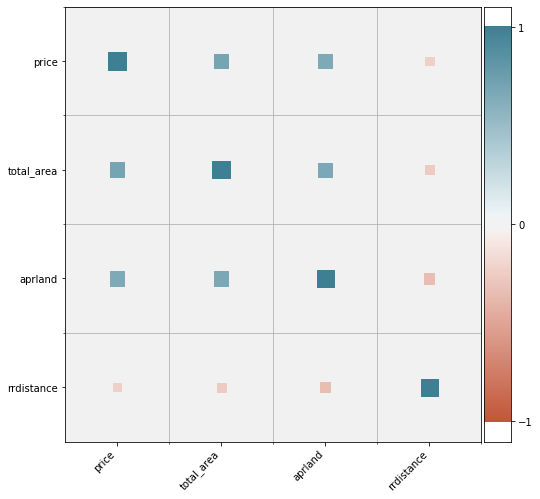

In [37]:
plt.figure(figsize=(8,8))
corrplot(df5.corr(), size_scale=300)

In [38]:
#Very interesting we get a negative correlation between rrdistance and price
df5.corr()

,price,total_area,aprland,rrdistance
price,1.000000,0.705471,0.662699,-0.224299
total_area,0.705471,1.000000,0.676942,-0.257568
aprland,0.662699,0.676942,1.000000,-0.343996
rrdistance,-0.224299,-0.257568,-0.343996,1.000000


In [28]:
#Playing around with distance a bit more
#Limiting between 400 ft to 800ft should ensure distance is two houses away
sql6 = "select price, total_area, volusia.sales_analysis.aprland, rrdistance from volusia.sales_analysis inner join volusia.parcel on (volusia.sales_analysis.parid = volusia.parcel.parid) where rmbed = 3 and volusia.sales_analysis.luc = '0100' and rrdistance between 401 and 801"
df6 = pd.read_sql_query(sql6, conn)
df6 = df6.dropna()

In [29]:
df6.head()

,price,total_area,aprland,rrdistance
0,261000.0,2520.0,30000.0,640.496684
1,244900.0,2188.0,30000.0,632.166754
2,235300.0,2100.0,30000.0,620.642019
3,230100.0,2387.0,30000.0,585.979540
4,249000.0,2588.0,30000.0,632.435852


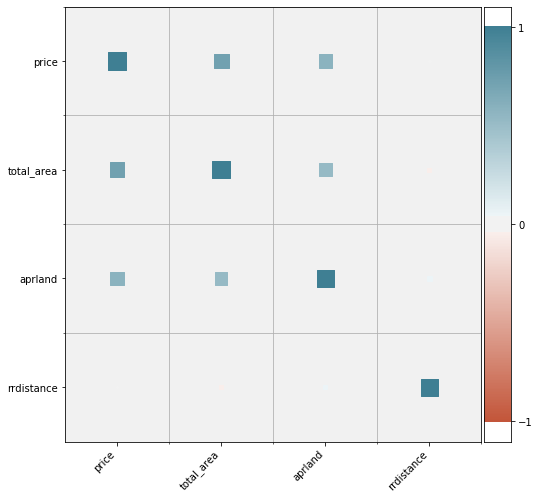

In [31]:
plt.figure(figsize=(8,8))
corrplot(df6.corr(), size_scale=300)

In [32]:
#It seems that 400ft is the critical distance for correlations
df6.corr()

,price,total_area,aprland,rrdistance
price,1.000000,0.727171,0.584736,-0.010782
total_area,0.727171,1.000000,0.522171,-0.042092
aprland,0.584736,0.522171,1.000000,0.053929
rrdistance,-0.010782,-0.042092,0.053929,1.000000


In [33]:
#Does number of bedrooms matter?
sql7 = "select price, total_area, volusia.sales_analysis.aprland, rrdistance from volusia.sales_analysis inner join volusia.parcel on (volusia.sales_analysis.parid = volusia.parcel.parid) where rmbed = 2 and volusia.sales_analysis.luc = '0100' and rrdistance < 401"
df7 = pd.read_sql_query(sql7, conn)
df7 = df7.dropna()

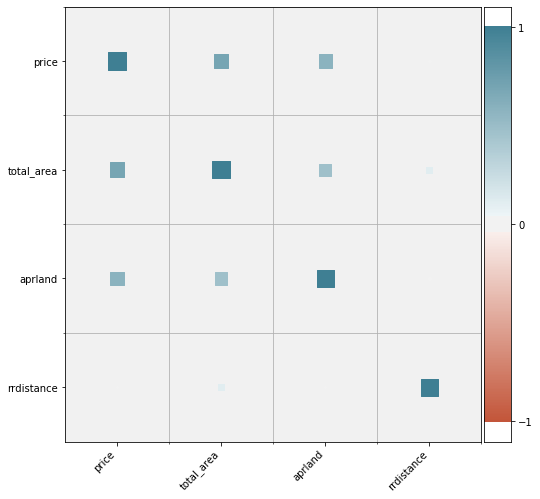

In [34]:
plt.figure(figsize=(8,8))
corrplot(df7.corr(), size_scale=300)

In [39]:
#Apparenlty it does
df7.corr()

,price,total_area,aprland,rrdistance
price,1.000000,0.699837,0.585887,0.009670
total_area,0.699837,1.000000,0.481229,0.116112
aprland,0.585887,0.481229,1.000000,0.007933
rrdistance,0.009670,0.116112,0.007933,1.000000


In [40]:
#What about 4 bedrooms
sql8 = "select price, total_area, volusia.sales_analysis.aprland, rrdistance from volusia.sales_analysis inner join volusia.parcel on (volusia.sales_analysis.parid = volusia.parcel.parid) where rmbed = 4 and volusia.sales_analysis.luc = '0100' and rrdistance < 401"
df8 = pd.read_sql_query(sql8, conn)
df8 = df8.dropna()

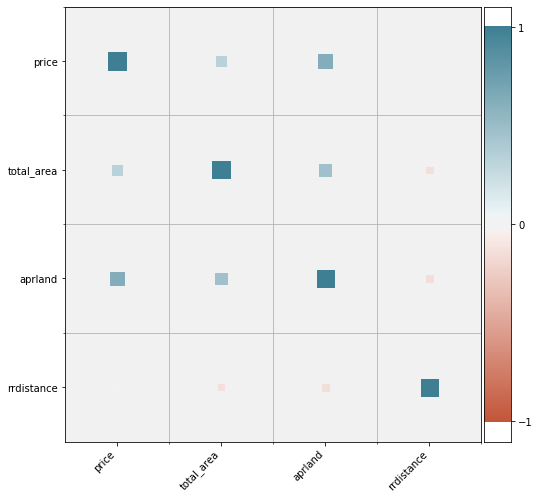

In [41]:
plt.figure(figsize=(8,8))
corrplot(df8.corr(), size_scale=300)

In [42]:

df8.corr()

,price,total_area,aprland,rrdistance
price,1.000000,0.333951,0.626872,0.028769
total_area,0.333951,1.000000,0.467760,-0.125695
aprland,0.626872,0.467760,1.000000,-0.140999
rrdistance,0.028769,-0.125695,-0.140999,1.000000


Text(0, 0.5, 'price')

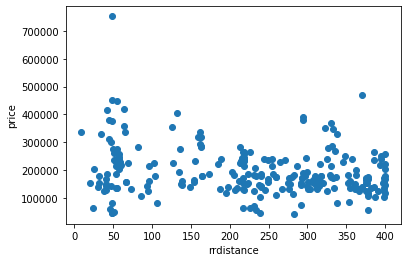

In [55]:
#Three bedroom houses within 400 ft seem to have the most genuine effect on price when evaluating on the basis of rrdistance
%matplotlib inline

plt.scatter(df5['rrdistance'], df5['price'], marker='o')
plt.xlabel('rrdistance')
plt.ylabel('price')

Text(0, 0.5, 'price')

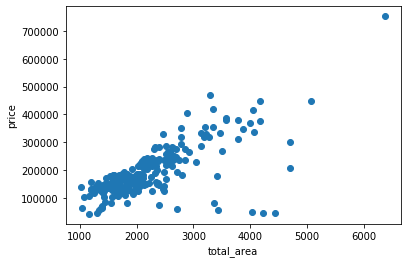

In [64]:
#total area still seems to be the strongest variable
%matplotlib inline

plt.scatter(df5['total_area'], df5['price'], marker='o')
plt.xlabel('total_area')
plt.ylabel('price')

Text(0, 0.5, 'total_area')

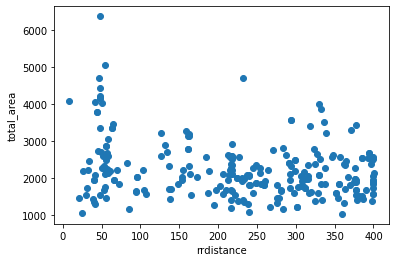

In [108]:
#rrdistance seems to correlate with total area
# rrdistance itself may not be indicative of a lower price. It may be indicative of a smaller house
%matplotlib inline

plt.scatter(df5['rrdistance'], df5['total_area'], marker='o')
plt.xlabel('rrdistance')
plt.ylabel('total_area')

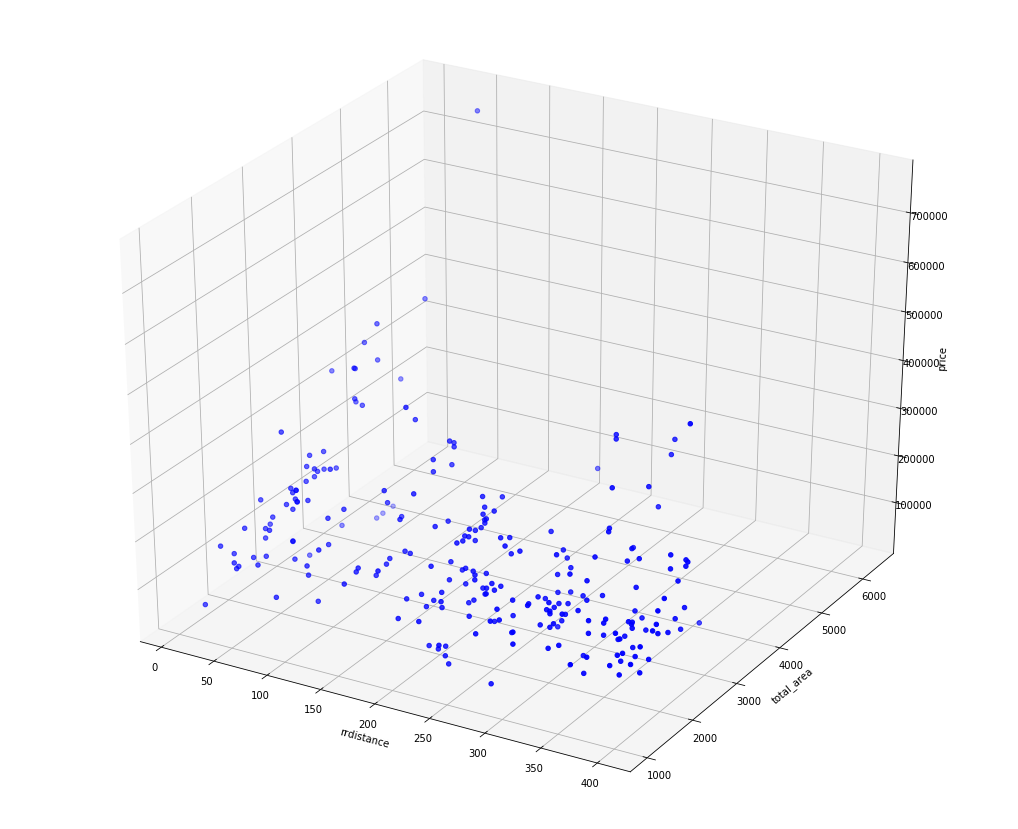

In [53]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df5['rrdistance'],
           df5['total_area'],
           df5['price'],
           c='b')

ax.set_xlabel("rrdistance")
ax.set_ylabel("total_area")
ax.set_zlabel("price")
plt.show()

In [63]:
#Regression for single family 3 bedroom houses within 400ft
x = pd.DataFrame(np.c_[df5['total_area'], df5['aprland'], df5['rrdistance']], columns = ['total_area','aprland', 'rrdistance'])
Y = df5['price']

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)

In [58]:
print(x_train.shape)
print(Y_train.shape)

(177, 3)
(177,)


In [59]:
print(x_test.shape)
print(Y_test.shape)

(77, 3)
(77,)


In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))

R-squared: 0.5958


3293393036.567499


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

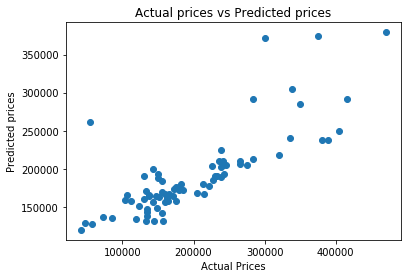

In [62]:
from sklearn.metrics import mean_squared_error
price_pred = model.predict(x_test)
mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")

In [66]:
#568 Dorset Cir, Daytona Beach, FL 32119
sql9 = "select price, total_area, volusia.sales_analysis.aprland, rrdistance, rmbed, volusia.sales_analysis.luc from volusia.sales_analysis inner join volusia.parcel on (volusia.sales_analysis.parid = volusia.parcel.parid) where rmbed = 3 and volusia.sales_analysis.luc = '0100' and rrdistance < 401 and volusia.sales_analysis.parid = '3459083'"
house1 = pd.read_sql_query(sql9, conn)
house1 = house1.dropna()



In [67]:
house1.head()

,price,total_area,aprland,rrdistance,rmbed,luc
0,170000.0,1897.0,27500.0,375.019769,3.0,0100


In [87]:
# Zillow info: https://www.zillow.com/homes/568-Dorset-Cir-South-Daytona,-FL,-32119_rb/48040751_zpid/
# House prediction is $10000 more than what is sold and $20000 less than anticipated on Zillow
x_house1 = pd.DataFrame(np.c_[house1['total_area'], house1['aprland'], house1['rrdistance']], columns = ['total_area','aprland', 'rrdistance'])
prediction_1 = model.predict(x_house1)[0]
actual_1 = house1['price'][0]
difference_1 =  actual_1 - prediction_1
print("Predicted price: {}, Actual price: {}, Difference: {}".format(prediction_1, actual_1, difference_1))

Predicted price: 180148.4806103923, Actual price: 170000.0, Difference: -10148.48061039229


In [79]:
#2461 Anastasia Dr, Daytona Beach, FL 32119
sql10 = "select price, total_area, volusia.sales_analysis.aprland, rrdistance, rmbed, volusia.sales_analysis.luc from volusia.sales_analysis inner join volusia.parcel on (volusia.sales_analysis.parid = volusia.parcel.parid) where volusia.sales_analysis.parid = '3436857'"
house2 = pd.read_sql_query(sql10, conn)
house2 = house2.dropna()


In [80]:
house2.head()

,price,total_area,aprland,rrdistance,rmbed,luc
0,169000.0,1944.0,15408.0,40.671942,3.0,0100


In [89]:
# Zillow info: https://www.zillow.com/homes/2461-Anastasia-Dr-South-Daytona,-FL,-32119_rb/48038347_zpid/
# House prediction is about $12000 less than what is sold and $23000 less than anticipated on Zillow
x_house2 = pd.DataFrame(np.c_[house2['total_area'], house2['aprland'], house2['rrdistance']], columns = ['total_area','aprland', 'rrdistance'])
prediction_2 = model.predict(x_house2)[0]
actual_2 = house2['price'][0]
difference_2 =  actual_2 - prediction_2
print("Predicted price: {}, Actual price: {}, Difference: {}".format(prediction_2, actual_2, difference_2))

Predicted price: 156652.71462038794, Actual price: 169000.0, Difference: 12347.285379612062


In [90]:
#480 Redwood Ave, Orange City, FL 32763
sql11 = "select price, total_area, volusia.sales_analysis.aprland, rrdistance, rmbed, volusia.sales_analysis.luc from volusia.sales_analysis inner join volusia.parcel on (volusia.sales_analysis.parid = volusia.parcel.parid) where volusia.sales_analysis.parid = '5562671'"
house3 = pd.read_sql_query(sql11, conn)
house3 = house3.dropna()

In [91]:
house3.head()

,price,total_area,aprland,rrdistance,rmbed,luc
0,132000.0,1799.0,11093.0,275.945378,3.0,0100


In [92]:
# Zillow info: https://www.zillow.com/homes/480-Redwood-Ave-Orange-City,-FL,-32763_rb/47949499_zpid/
# House prediction is about $21000 more than what is sold and $60000 less than anticipated on Zillow
x_house3 = pd.DataFrame(np.c_[house3['total_area'], house3['aprland'], house3['rrdistance']], columns = ['total_area','aprland', 'rrdistance'])
prediction_3 = model.predict(x_house3)[0]
actual_3 = house3['price'][0]
difference_3 =  actual_3 - prediction_3
print("Predicted price: {}, Actual price: {}, Difference: {}".format(prediction_3, actual_3, difference_3))

Predicted price: 153407.88191180522, Actual price: 132000.0, Difference: -21407.88191180522


In [93]:
#287 E Fiesta Key Loop
sql12 = "select price, total_area, volusia.sales_analysis.aprland, rrdistance, rmbed, volusia.sales_analysis.luc from volusia.sales_analysis inner join volusia.parcel on (volusia.sales_analysis.parid = volusia.parcel.parid) where volusia.sales_analysis.parid = '8002023'"
house4 = pd.read_sql_query(sql12, conn)
house4 = house4.dropna()

In [94]:
house4.head()

,price,total_area,aprland,rrdistance,rmbed,luc
0,233200.0,2376.0,30000.0,217.13992,3.0,0100


In [97]:
# Zillow info: https://www.zillow.com/homes/287-E-Fiesta-Key-Loop-Deland,-FL,-32720_rb/252438403_zpid/
# House prediction is about $35000 less than what is sold. No anticipated data from Zillow
x_house4 = pd.DataFrame(np.c_[house4['total_area'], house4['aprland'], house4['rrdistance']], columns = ['total_area','aprland', 'rrdistance'])
prediction_4 = model.predict(x_house4)[0]
actual_4 = house4['price'][0]
difference_4 =  actual_4 - prediction_4
print("Predicted price: {}, Actual price: {}, Difference: {}".format(prediction_4, actual_4, difference_4))

Predicted price: 197846.00132218175, Actual price: 233200.0, Difference: 35353.99867781825


In [98]:
#1807 SEGRAVE ST
sql13 = "select price, total_area, volusia.sales_analysis.aprland, rrdistance, rmbed, volusia.sales_analysis.luc from volusia.sales_analysis inner join volusia.parcel on (volusia.sales_analysis.parid = volusia.parcel.parid) where volusia.sales_analysis.parid = '3555449'"
house5 = pd.read_sql_query(sql13, conn)
house5 = house5.dropna()

In [99]:
house5.head()

,price,total_area,aprland,rrdistance,rmbed,luc
0,150000.0,1452.0,25245.0,278.233923,3.0,0100


In [102]:
#Zillow info: https://www.zillow.com/homes/1807-SEGRAVE-ST_rb/48047791_zpid/
# House prediction is about $5600 more than what is sold and $22000 lower than anticipated on Zillow.
x_house5 = pd.DataFrame(np.c_[house5['total_area'], house5['aprland'], house5['rrdistance']], columns = ['total_area','aprland', 'rrdistance'])
prediction_5 = model.predict(x_house5)[0]
actual_5 = house5['price'][0]
difference_5 =  actual_5 - prediction_5
print("Predicted price: {}, Actual price: {}, Difference: {}".format(prediction_5, actual_5, difference_5))

Predicted price: 155606.0233253924, Actual price: 150000.0, Difference: -5606.023325392394


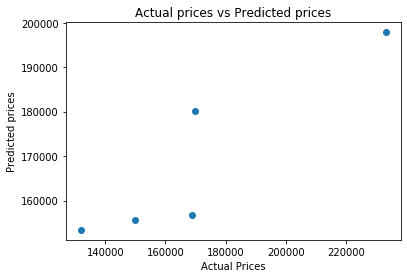

In [103]:
# Actual vs Predicted plot
x = np.array([actual_1, actual_2, actual_3, actual_4, actual_5])
y = np.array([prediction_1, prediction_2, prediction_3, prediction_4, prediction_5])
plt.scatter(x, y)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show() 

In [105]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
x = pd.DataFrame(np.c_[df5['total_area'], df5['aprland'], df5['rrdistance']], columns = ['total_area','aprland', 'rrdistance'])
Y = df5['price']
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [106]:
print('R-squared: %.4f' % neigh.score(x_test,
                                      Y_test))

R-squared: 0.5324


3809480077.922078


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

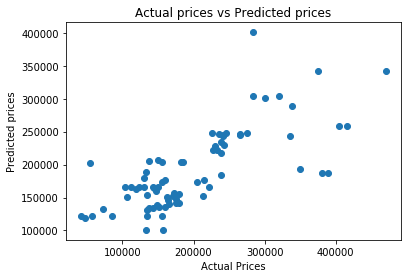

In [107]:
price_pred = neigh.predict(x_test)
mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")

In [109]:
#Re-do difference calculations for KNN
#House 1 prediction is interesting. $34000 more than price sold, but $1000 more than anticipated on Zillow
x_house1 = pd.DataFrame(np.c_[house1['total_area'], house1['aprland'], house1['rrdistance']], columns = ['total_area','aprland', 'rrdistance'])
prediction_1 = neigh.predict(x_house1)[0]
actual_1 = house1['price'][0]
difference_1 =  actual_1 - prediction_1
print("Predicted price: {}, Actual price: {}, Difference: {}".format(prediction_1, actual_1, difference_1))

Predicted price: 204200.0, Actual price: 170000.0, Difference: -34200.0


In [111]:
#House 2 is $17900 away from actual and almost $30000 less than ancticipated on Zillow
x_house2 = pd.DataFrame(np.c_[house2['total_area'], house2['aprland'], house2['rrdistance']], columns = ['total_area','aprland', 'rrdistance'])
prediction_2 = neigh.predict(x_house2)[0]
actual_2 = house2['price'][0]
difference_2 =  actual_2 - prediction_2
print("Predicted price: {}, Actual price: {}, Difference: {}".format(prediction_2, actual_2, difference_2))

Predicted price: 151100.0, Actual price: 169000.0, Difference: 17900.0


In [112]:
#House 3 is $12000 more than what is sold and $68000 less than anticipated on Zillow
x_house3 = pd.DataFrame(np.c_[house3['total_area'], house3['aprland'], house3['rrdistance']], columns = ['total_area','aprland', 'rrdistance'])
prediction_3 = neigh.predict(x_house3)[0]
actual_3 = house3['price'][0]
difference_3 =  actual_3 - prediction_3
print("Predicted price: {}, Actual price: {}, Difference: {}".format(prediction_3, actual_3, difference_3))

Predicted price: 144000.0, Actual price: 132000.0, Difference: -12000.0


In [113]:
#House 4 is $1760 more than what is sold. No anticipated data available on Zillow
x_house4 = pd.DataFrame(np.c_[house4['total_area'], house4['aprland'], house4['rrdistance']], columns = ['total_area','aprland', 'rrdistance'])
prediction_4 = neigh.predict(x_house4)[0]
actual_4 = house4['price'][0]
difference_4 =  actual_4 - prediction_4
print("Predicted price: {}, Actual price: {}, Difference: {}".format(prediction_4, actual_4, difference_4))

Predicted price: 234960.0, Actual price: 233200.0, Difference: -1760.0


In [115]:
# House 5 is $7560 more than what is sold and $20000 less than anticiapted
x_house5 = pd.DataFrame(np.c_[house5['total_area'], house5['aprland'], house5['rrdistance']], columns = ['total_area','aprland', 'rrdistance'])
prediction_5 = neigh.predict(x_house5)[0]
actual_5 = house5['price'][0]
difference_5 =  actual_5 - prediction_5
print("Predicted price: {}, Actual price: {}, Difference: {}".format(prediction_5, actual_5, difference_5))

Predicted price: 157560.0, Actual price: 150000.0, Difference: -7560.0


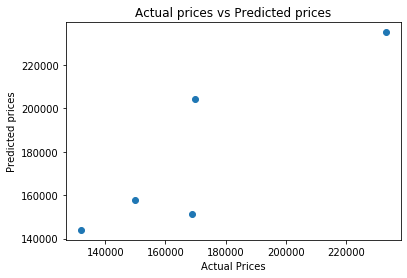

In [116]:
# Actual vs Predicted plot
#KNN regression is the clear winner here 
x = np.array([actual_1, actual_2, actual_3, actual_4, actual_5])
y = np.array([prediction_1, prediction_2, prediction_3, prediction_4, prediction_5])
plt.scatter(x, y)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show() 